In [23]:
# load all the corresponding packages
# each package is important for different functionalities
# the main package use will be the pandas package
import pandas as pd
from collections import Counter
from gensim.parsing.preprocessing import preprocess_string,strip_tags, strip_punctuation, remove_stopwords
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# load the dataframe of your interest
records_dataframes = pd.read_csv("../Data/NLP/IL6.csv")

In [7]:
records_dataframes.head()

,Unnamed: 0,ID,abstract,Title,Journal,Publication_date,first,last
0,0,36594412,1-Octacosanol (Octa) is reported to possess ma...,Orally administered octacosanol improves liver...,Food & function,2023 Jan 3,"Ding, Yin-Yi","Shen, Qing"
1,1,36594097,Acute kidney injury (AKI) is a pathological co...,Direct targeting of sEH with alisol B alleviat...,International journal of biological sciences,2023,"Zhang, Juan","Ma, Xiao-Chi"
2,2,36594093,Rheumatoid arthritis (RA) is a prototypic infl...,Nesfatin-1 Stimulates CCL2-dependent Monocyte ...,International journal of biological sciences,2023,"Chang, Jun-Way","Tang, Chih-Hsin"
3,3,36594066,OBJECTIVES: To investigate the effect of mogro...,Inhibition of Mogroside IIIE on isoproterenol-...,Iranian journal of basic medical sciences,2023 Jan,"Yanan, Shi","Wei, Liu"
4,4,36594061,"OBJECTIVES: The current study, the first of it...",Thymoquinone played a protective role against ...,Iranian journal of basic medical sciences,2023 Jan,"Demircigil, Nursena","Erdemli, Mehmet Erman"


In [8]:
records_dataframes.tail()

,Unnamed: 0,ID,abstract,Title,Journal,Publication_date,first,last
9921,13,35452301,Background: Photobiomodulation (PBM) is praise...,Web Crawling and mRNA Sequencing Analyze Mecha...,"Photobiomodulation, photomedicine, and laser s...",2022 Apr,"Wu, Hao","Liu, Hailiang"
9922,14,35452290,Coronary artery disease (CAD) remains the lead...,Genome-wide pleiotropy analysis of coronary ar...,Science advances,2022 Apr 22,"Yu, Zhi","Natarajan, Pradeep"
9923,15,35451710,BACKGROUND AND AIMS: We have previously shown ...,Gabexate Mesylate-Poloxamer 407 Conjugate Alle...,Digestive diseases and sciences,2022 Apr 22,"Song, Qing","Luo, Yukun"
9924,16,35451502,We previously reported that a novel haemoglobi...,Novel prognostic predictor of haemoglobin-plat...,British journal of haematology,2022 Jul,"Taniguchi, Takahide","Matsumura, Itaru"
9925,17,35451424,Microglia is activated and polarized to pro‑in...,Apelin‑13 ameliorates LPS‑induced BV‑2 microgl...,Acta neurobiologiae experimentalis,2022,"Peng, Qing-Ming","Zhao, Qun"


In [10]:
records_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9926 entries, 0 to 9925
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        9926 non-null   int64 
 1   ID                9926 non-null   int64 
 2   abstract          9926 non-null   object
 3   Title             9926 non-null   object
 4   Journal           9926 non-null   object
 5   Publication_date  9926 non-null   object
 6   first             9926 non-null   object
 7   last              9926 non-null   object
dtypes: int64(2), object(6)
memory usage: 620.5+ KB


In [9]:
print(records_dataframes.columns)
print(records_dataframes.index)

Index(['Unnamed: 0', 'ID', 'abstract', 'Title', 'Journal', 'Publication_date',
       'first', 'last'],
      dtype='object')
RangeIndex(start=0, stop=9926, step=1)


In [5]:
# how can we make specific changes to the dataframe
# the iloc function lets you select by index [row, column]
# the shape function is nothing else than the length for the index and the columns
records_dataframes["class"] = "IL6"
records_dataframes = records_dataframes.iloc[:2500,]
records_dataframes.shape

(2500, 9)

In [11]:
# also usually used to retrieve min, max, mean for each column if numeric, int, float
print(records_dataframes.describe())

        Unnamed: 0            ID
count  9926.000000  9.926000e+03
mean      9.430486  3.602123e+07
std       5.731222  3.233602e+05
min       0.000000  3.545142e+07
25%       4.000000  3.574501e+07
50%       9.000000  3.601519e+07
75%      14.000000  3.629430e+07
max      19.000000  3.659441e+07


In [31]:
# getting directly from the pandas package
top_journals_df = pd.DataFrame(records_dataframes["Journal"].value_counts()).reset_index()
top_journals_df

,index,Journal
0,International journal of molecular sciences,313
1,Frontiers in immunology,304
2,Frontiers in pharmacology,213
3,Evidence-based complementary and alternative m...,171
4,Scientific reports,141
...,...,...
2034,The Journal of toxicological sciences,1
2035,Journal of cell science,1
2036,The Journal of pharmacy technology : jPT : off...,1
2037,Animal cells and systems,1


<AxesSubplot: xlabel='Journal', ylabel='index'>

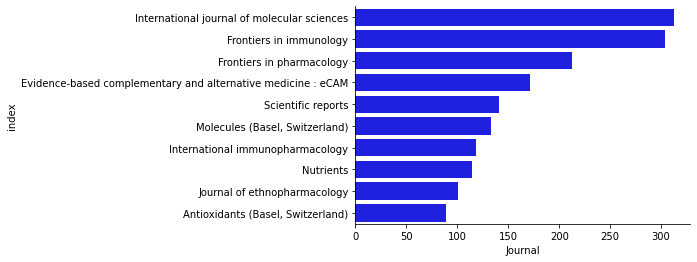

In [33]:
# here we write the function
top_10 = top_journals_df.iloc[:10, :]
fig,ax = plt.subplots()
sns.despine()
sns.barplot(x = "Journal", y = "index", data = top_10, color = "blue")

In [30]:
# Question: How can we calculate from this the percentage?
# Answer: This can be performed on the slicing operation
top_journals_df["frequency"] = (top_journals_df["Journal"]/ top_journals_df["Journal"].sum()) * 100
top_journals_df

,index,Journal,frequency
0,International journal of molecular sciences,313,18.444313
1,Frontiers in immunology,304,17.913966
2,Frontiers in pharmacology,213,12.551562
3,Evidence-based complementary and alternative m...,171,10.076606
4,Scientific reports,141,8.308780
5,"Molecules (Basel, Switzerland)",133,7.837360
6,International immunopharmacology,118,6.953447
7,Nutrients,114,6.717737
8,Journal of ethnopharmacology,101,5.951679
9,"Antioxidants (Basel, Switzerland)",89,5.244549


In [54]:
# Repurpose counter function for word frequency?
# thats why writing function/class methods is important
# We reduce workload, error rates and increase efficency
# Let's look at the Table for the abstracts
# check the what happens without removing stopwords

def records_tolist(records: list, preprocessed = False, stopwords: list = False) -> pd.Series:
    """ 
    Of importance here is that you understand what you are doing 
    Functions are available gettting rid of stopwords 
    Removing Punctuations
    Introducing Lemmtization and more 
    Which is all important for NLP
    
    args:
        records type(list of lists) <- holds the word records
        stopwords(list) <- default None, holds the 
    """
    new_list_of_words = []
    for texts in records:
        splitted_texts = texts.split(" ")
        new_list_of_words.extend(splitted_texts)
              
    counter = pd.DataFrame.from_dict(Counter(new_list_of_words), orient = "index")
    counter.columns = ["counts"]
    counter = counter.sort_values("counts", ascending = False)
    return counter    

word_series = records_tolist(records_dataframes["abstract"])
word_series

,counts
and,116716
the,103443
of,95865
in,64326
to,35840
...,...
Laportea,1
"receptor(EGFR),",1
"D1(CCND1),",1
"8(MAPK8),",1


In [99]:
# Self created list of stopwords
# Usually not the way to go, but to gain understanding of how to process the data
stopwords = ["the","of","in","to",
             "with","were","a","was",
             "by","the", "the","that",
             "for","is","as","on","significant",
             "among","although","especially","kg",
             "km","mainly","ml","mm",
             "disease","significantly","obtained","mutation",
             "significant","quite","result","results","estimated",
             "interesting","conducted","associated","performed",
             "respectively","larger","genes","gene", "mutations",
             "related","expression","pattern","mutation","clc","identified",
             "suprisingly","preferentially","subsequently","far","little",
             "known","importantly","synonymous","skipping","father",
             "mother","pedigree","novo","rescues","rescued","restored",
             "exhibits","induce", "Background","Objective","Methods",
             "cells", "kinase","activation","protein",
             "be","at", "we", "p","from","or","after","treatment",
             "=", "are",".", "an"
            ]
word_series_no_stop = records_tolist(records_dataframes["abstract"], stopwords = stopwords)
word_series_no_stop.iloc[1:20]

levels          2630
this            2621
patients        2346
inflammatory    2231
il-6            2057
group           1735
study           1730
increased       1555
il-6,           1550
cell            1501
these           1405
which           1377
effects         1271
mice            1252
showed          1232
effect          1213
compared        1154
serum           1116
used            1103
dtype: int64

In [100]:
#Check with preprocessing
def preprocessing_list(liste,stopword_list):
    """ 
    preprocess the abstract list, remove stopwords, punctuations, numbers
    input: 
    liste: list of abstracts
    stopword_list: list of stopwords
    returns list of list <- holding the abstracts
    """
    processed_abstracts = []
    for i in liste:
        CUSTOM_FILTERS = [lambda x: x.lower(),remove_stopwords]
        a = preprocess_string(i, CUSTOM_FILTERS)
        no_integers = [x for x in a if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]
        no_integers = [x for x in no_integers if x not in stopword_list]
        no_integers = [re.sub("[^A-Za-z0-9|-]","",x) for x in no_integers]
        processed_abstracts.append(no_integers)
    return processed_abstracts

# add the processed abstracts
records_dataframes["processed_abstract"] = preprocessing_list(records_dataframes["abstract"].tolist(),stopwords)
# and now count the preprocessed ones rather than the original abstracts
word_series_prep = records_tolist(records_dataframes["processed_abstract"], True, stopwords = stopwords)
word_series_prep[:20]

il-6            3770
levels          2992
patients        2955
group           2677
study           2398
inflammatory    2246
mice            1950
increased       1655
                1648
tnf-alpha       1602
cell            1515
effects         1497
inflammation    1476
cytokines       1390
effect          1328
showed          1233
activity        1231
serum           1187
compared        1177
il-1beta        1168
dtype: int64

In [101]:
# what would be the next step here?
# we have a set of authors
# lets check who is the most famous author in the field?
# if you want to play further with ith 
# read about Doc2Vec/Word2Vec/Sentence2Vec # this is way more specific than tf-idf
# read about Bert Transformers
# an lower level example
# check the umap literature

from sklearn.feature_extraction.text import TfidfVectorizer # let student search what might be the input here

records_dataframes["joined_abstracts"] = [ " ".join(i) for i in records_dataframes["processed_abstract"]]
vectorizer = TfidfVectorizer(min_df=5,stop_words='english')
X = vectorizer.fit_transform(records_dataframes["joined_abstracts"])
df_tf_idf = pd.DataFrame(
    data=X.todense().round(2),
    columns=vectorizer.get_feature_names_out()
)

df_tf_idf.T

,0,1,2,3,4,5,6,7,8,9,...,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858
0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zinc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


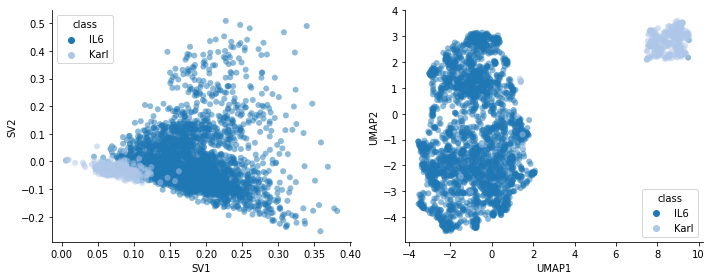

In [106]:
# lets see if we can deduce something from this list
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from umap.umap_ import UMAP

# we could try to run here 
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
data_svd = svd.fit_transform(df_tf_idf)
data_svd = pd.DataFrame(data_svd, index = records_dataframes.index, columns = ["SV1", "SV2"])
reducer = UMAP(metric='hellinger')
data_umap = reducer.fit_transform(df_tf_idf)
data_umap = pd.DataFrame(data_umap, index = records_dataframes.index, columns = ["UMAP1", "UMAP2"])

#set the class of the data according to the literature
data_umap["class"] = records_dataframes["class"]
data_svd["class"] = records_dataframes["class"]

# retrieve the clusters here
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (10,4))
sns.despine() # removes upper and left axis
sns.scatterplot(data = data_svd, 
                x = "SV1",
                y= "SV2",
                hue = "class",
                ax = ax[0],
                palette = "tab20",
                linewidth = 0,
                alpha = 0.5)

sns.scatterplot(data = data_umap,
                x = "UMAP1",
                y = "UMAP2",
                hue = "class",
                ax = ax[1],
                palette = "tab20",
                linewidth = 0,
                alpha = 0.5)

plt.tight_layout()